# Лабораторная работа №1



## Основные характеристики датасета

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

data = pd.read_csv('./dnd-spells.csv', sep=",")

data.head(12)

,name,classes,level,school,cast_time,range,duration,verbal,somatic,material,material_cost,description
0,Acid Splash,"Artificer, Sorcerer, Wizard",0,Conjuration,1 Action,60 Feet,Instantaneous,1,1,0,NaN,You hurl a bubble of acid. Choose one creature...
1,Blade Ward,"Bard, Sorcerer, Warlock, Wizard",0,Abjuration,1 Action,Self,1 round,1,1,0,NaN,You extend your hand and trace a sigil of ward...
2,Booming Blade,"Artificer, Sorcerer, Warlock, Wizard",0,Evocation,1 Action,Self (5-foot radius),1 round,0,1,1,a melee weapon worth at least 1 sp,You brandish the weapon used in the spell’s ca...
3,Chill Touch,"Sorcerer, Warlock, Wizard",0,Necromancy,1 Action,120 Feet,1 round,1,1,0,NaN,"You create a ghostly, skeletal hand in the spa..."
4,Control Flames,"Druid, Sorcerer, Wizard",0,Transmutation,1 Action,60 Feet,Instantaneous or 1 hour,0,1,0,NaN,You choose nonmagical flame that you can see w...
5,Create Bonfire,"Druid, Sorcerer, Warlock, Wizard",0,Conjuration,1 Action,60 Feet,"Concentration, up to 1 minute",1,1,0,NaN,You create a bonfire on ground that you can se...
6,Dancing Lights,"Artificer, Bard, Sorcerer, Wizard",0,Evocation,1 Action,120 Feet,"Concentration, up to 1 minute",1,1,1,"a bit of phosphorus or wychwood, or a glowworm",You create up to four torch-sized lights withi...
7,Decompose (HB),Cleric,0,Necromancy,1 Action,Touch,1 minute,1,1,0,NaN,You reach out and touch the corpse of a creatu...
8,Druidcraft,Druid,0,Transmutation,1 Action,30 Feet,Instantaneous,1,1,0,NaN,"Whispering to the spirits of nature, you creat..."
9,Eldritch Blast,Warlock,0,Evocation,1 Action,120 Feet,Instantaneous,1,1,0,NaN,A beam of crackling energy streaks toward a cr...


In [2]:
# Количество строк и столбцов
data.shape

(554, 12)

In [3]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 554


In [4]:
# Список колонок
data.columns

Index(['name', 'classes', 'level', 'school', 'cast_time', 'range', 'duration',
       'verbal', 'somatic', 'material', 'material_cost', 'description'],
      dtype='object')

In [5]:
# Типы данных в колонках
data.dtypes

name             object
classes          object
level             int64
school           object
cast_time        object
range            object
duration         object
verbal            int64
somatic           int64
material          int64
material_cost    object
description      object
dtype: object

In [6]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

name - 0
classes - 0
level - 0
school - 0
cast_time - 0
range - 0
duration - 0
verbal - 0
somatic - 0
material - 0
material_cost - 264
description - 0


In [7]:
# Основные статистические характеристки набора данных
data.describe()

,level,verbal,somatic,material
count,554.000000,554.000000,554.000000,554.000000
mean,3.525271,0.945848,0.862816,0.523466
std,2.470128,0.226521,0.344353,0.499900
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,3.000000,1.000000,1.000000,1.000000
75%,5.000000,1.000000,1.000000,1.000000
max,9.000000,1.000000,1.000000,1.000000


In [8]:
# Определим уникальные значения для целевого признака
data['duration'].unique()

array(['Instantaneous', '1 round', 'Instantaneous or 1 hour',
       'Concentration, up to 1 minute', '1 minute', '8 hours', '1 hour',
       'Up to 1 hour', '10 minutes', 'Up to 1 minute',
       'Concentration up to 1 round', '24 hours',
       'Concentration, up to 1 hour', 'Concentration, up to 10 minutes',
       'Concentration, up to 8 hours', '10 days',
       'Until dispelled or triggered', 'Until dispelled',
       'Concentration, up to 1 day', 'Concentration, up to 10 minute',
       'Concentration, up to 1 minutes', 'Up to 10 minutes', '7 days',
       'Special', '30 days', '1 day', 'Concentration, up to 2 hours',
       '6 hours', 'Up to 8 hours', 'Concentration, up to 24 hours',
       'Concentration, up to 6 rounds'], dtype=object)

## Визуальное исследование датасета

Диаграмма рассеивания

<Axes: xlabel='cast_time', ylabel='duration'>

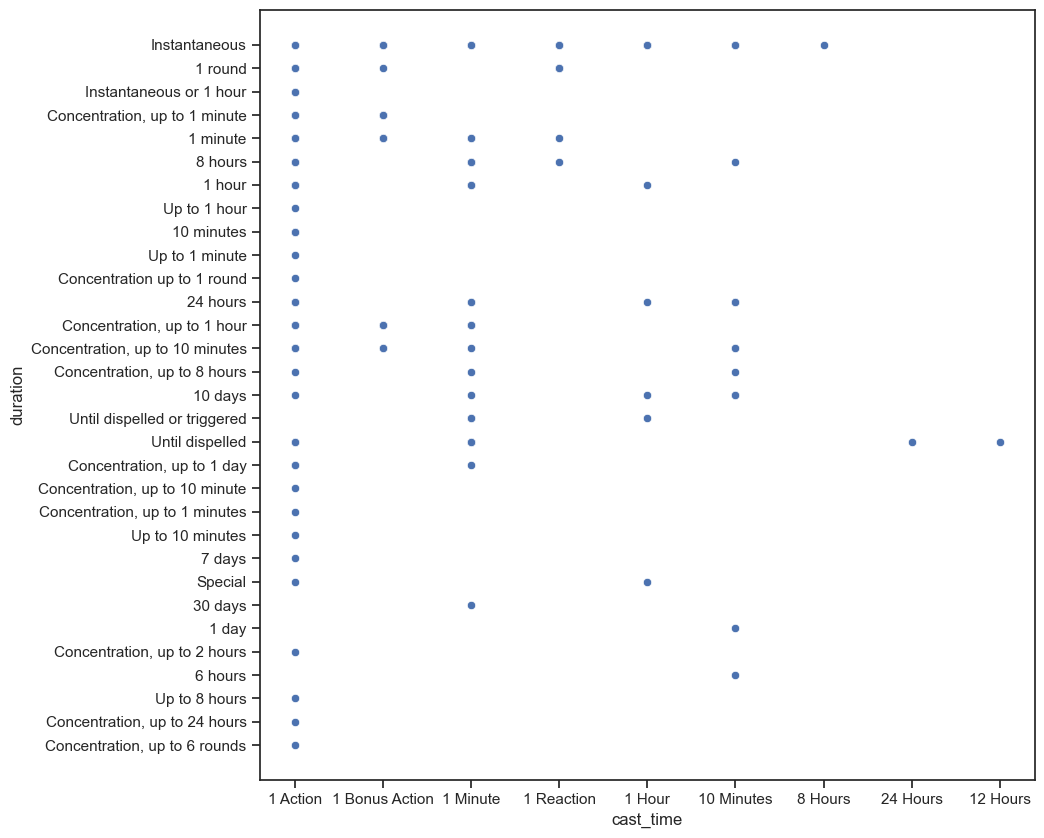

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='cast_time', y='duration', data=data)

<Axes: xlabel='cast_time', ylabel='duration'>

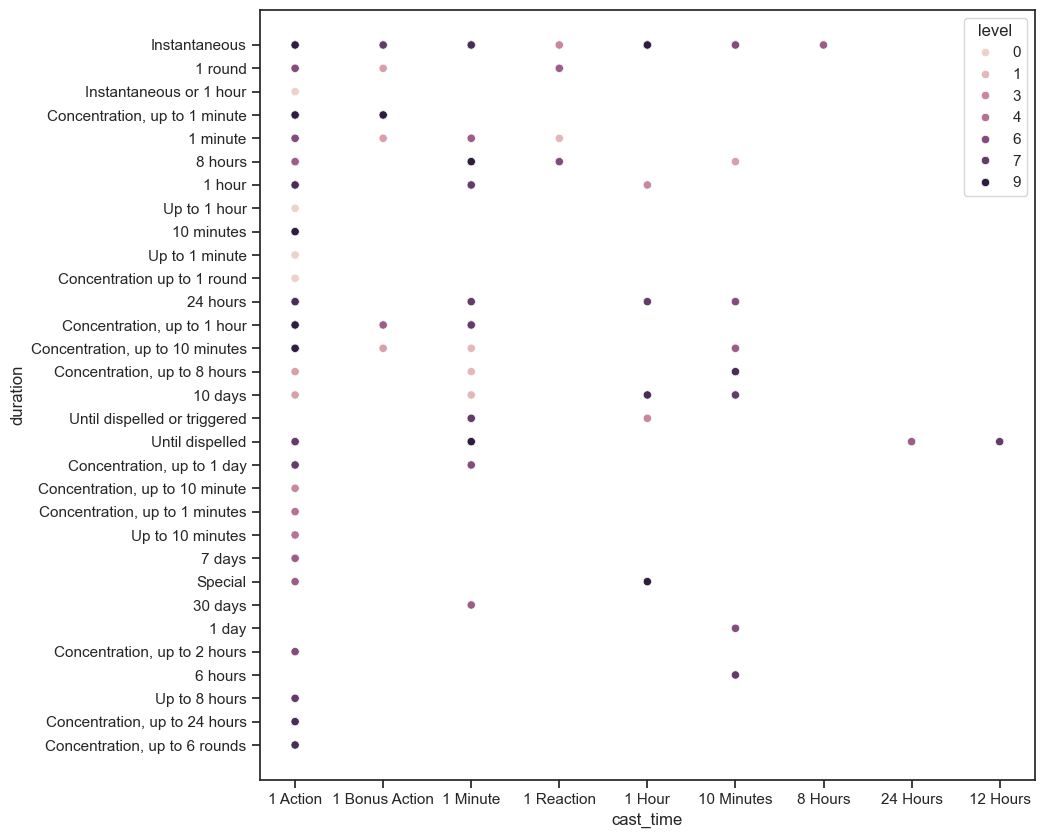

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='cast_time', y='duration', data=data, hue='level')

C:\Users\XAHTE\AppData\Local\Temp\ipykernel_16640\3635570045.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['level'])


<Axes: xlabel='level', ylabel='Density'>

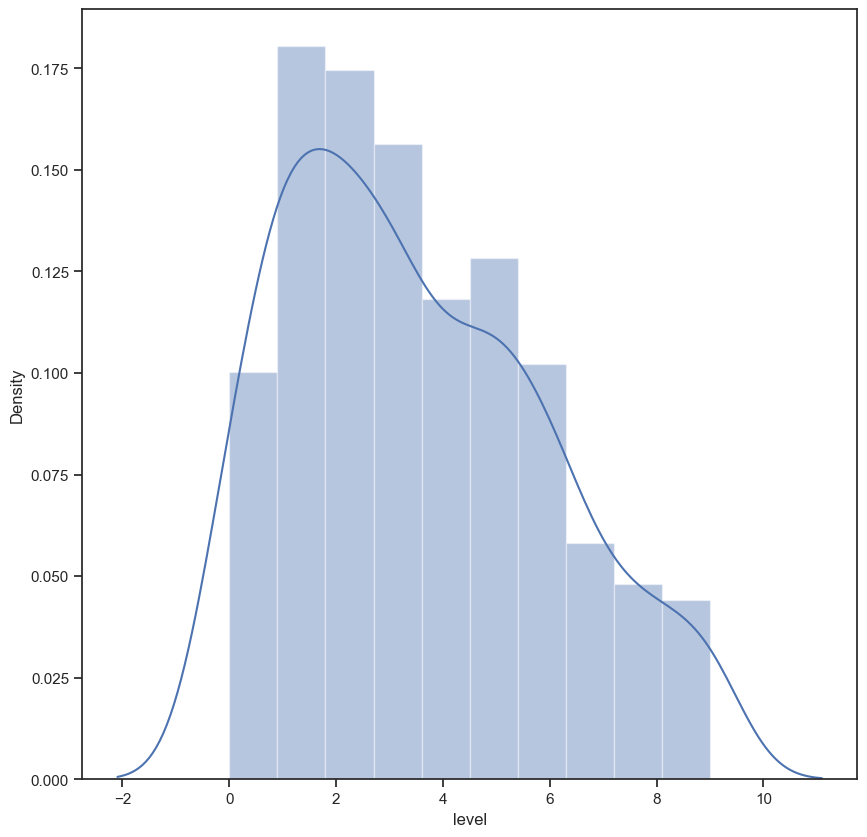

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['level'])

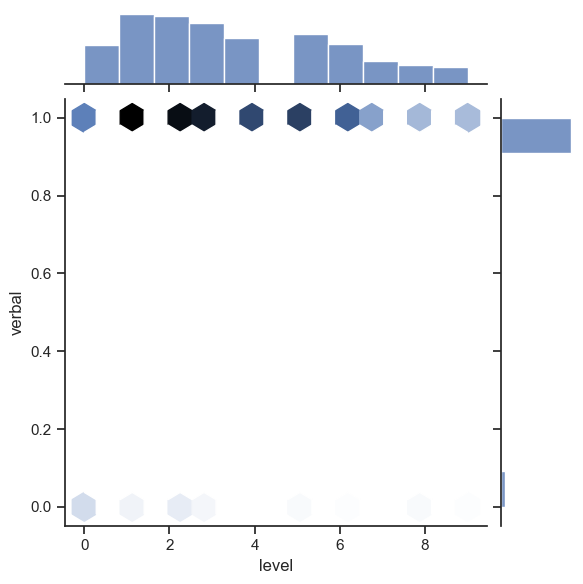

In [12]:
sns.jointplot(x='level', y='verbal', data=data, kind='hex')

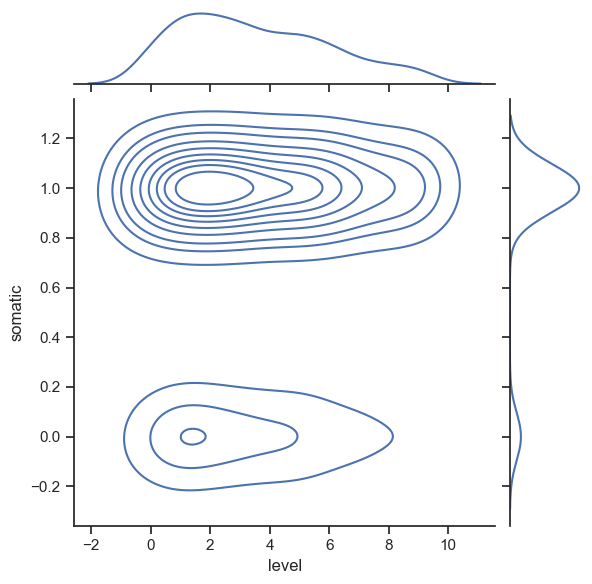

In [13]:
sns.jointplot(x='level', y='somatic', data=data, kind="kde")

In [14]:
sns.set_theme(style="ticks")

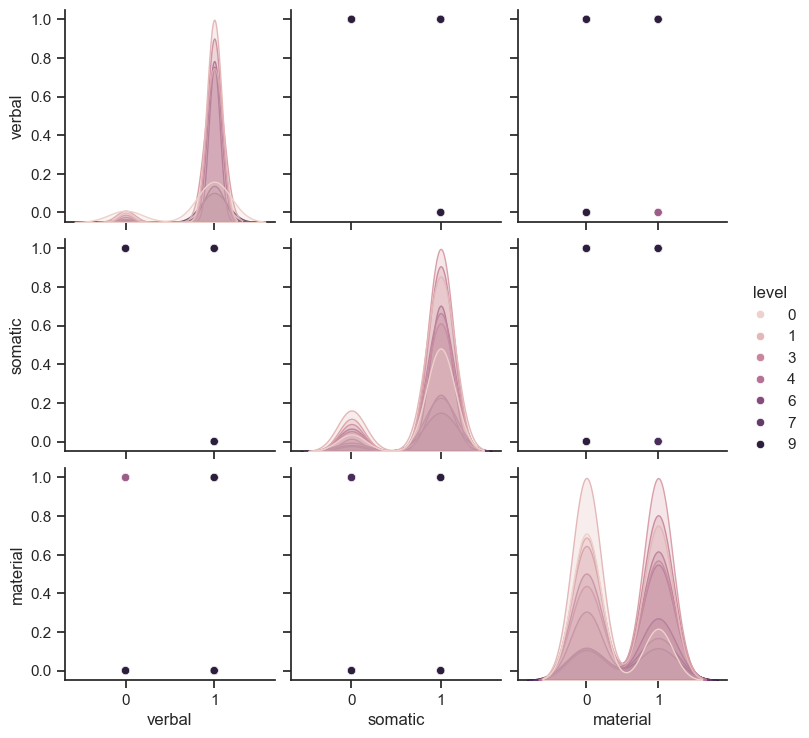

In [15]:
sns.pairplot(data, hue='level')

<Axes: ylabel='level'>

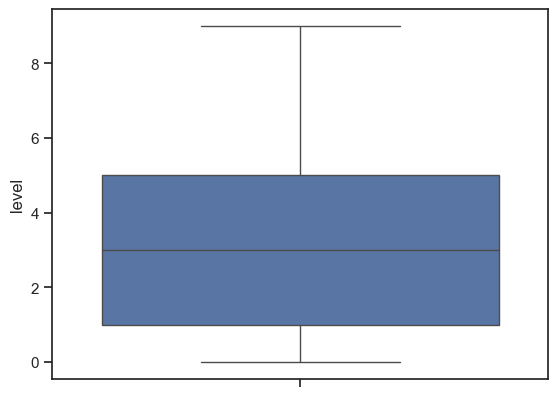

In [16]:
sns.boxplot(y=data['level'])

<Axes: xlabel='level', ylabel='range'>

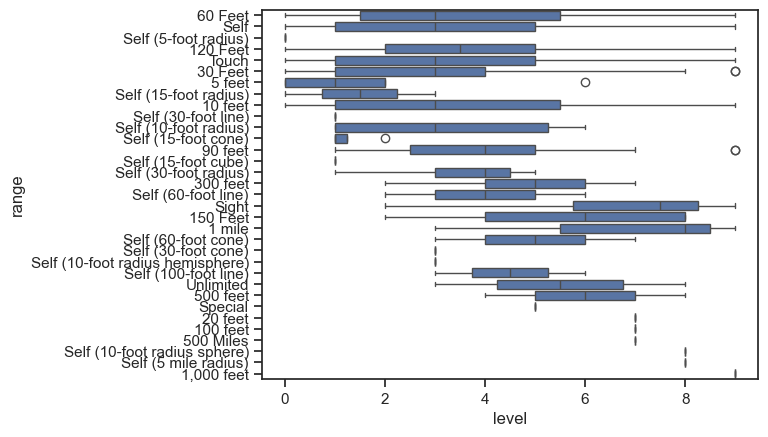

In [17]:
sns.boxplot(x='level', y='range', data=data)

## Информация о корреляции признаков

In [18]:
data.corr(numeric_only=True, method='pearson')

,level,verbal,somatic,material
level,1.000000,0.128491,0.052980,0.132783
verbal,0.128491,1.000000,-0.095409,0.059149
somatic,0.052980,-0.095409,1.000000,0.302364
material,0.132783,0.059149,0.302364,1.000000


In [19]:
data.corr(numeric_only=True, method='kendall')

,level,verbal,somatic,material
level,1.000000,0.126959,0.048583,0.128451
verbal,0.126959,1.000000,-0.095409,0.059149
somatic,0.048583,-0.095409,1.000000,0.302364
material,0.128451,0.059149,0.302364,1.000000


In [20]:
data.corr(numeric_only=True, method='spearman')

,level,verbal,somatic,material
level,1.000000,0.147145,0.056308,0.148874
verbal,0.147145,1.000000,-0.095409,0.059149
somatic,0.056308,-0.095409,1.000000,0.302364
material,0.148874,0.059149,0.302364,1.000000


<Axes: >

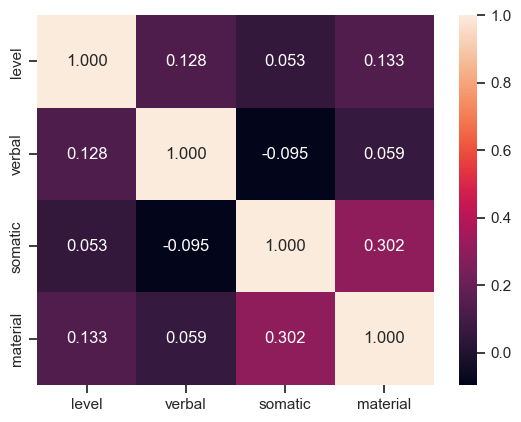

In [21]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.3f')